In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and Explore the Dataset


In [5]:
df = pd.read_csv('boston_housing.csv')
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Cleaning and Preprocessing


In [7]:
df.isnull().sum()
#  Impute missing values in 'rm' with the mean

# X_train['rm'].fillna(X_train['rm'].mean(), inplace=True)
# X_test['rm'].fillna(X_test['rm'].mean(), inplace=True)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

# Data Visualization (Exploratory Data Analysis)

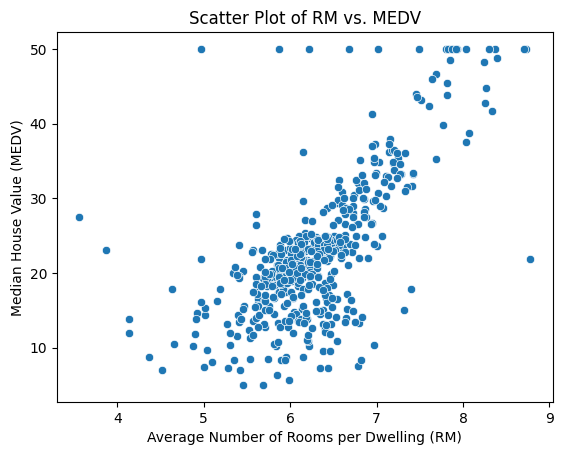

In [ ]:
sns.scatterplot(x='rm', y='medv', data=df)  
plt.title("Scatter Plot of RM vs. MEDV")
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.show()

<Axes: xlabel='medv', ylabel='Count'>

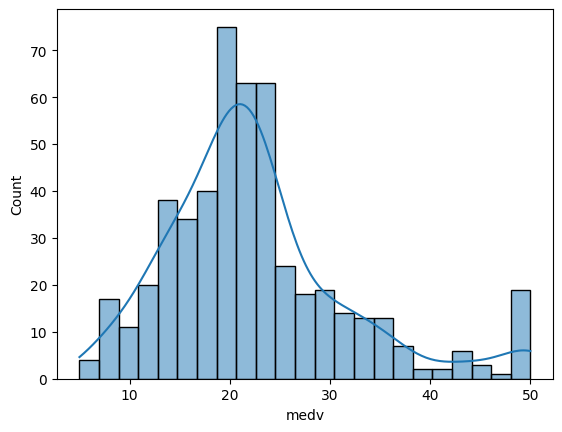

In [19]:
sns.histplot(data=df ,x='medv',kde=True)


<Axes: >

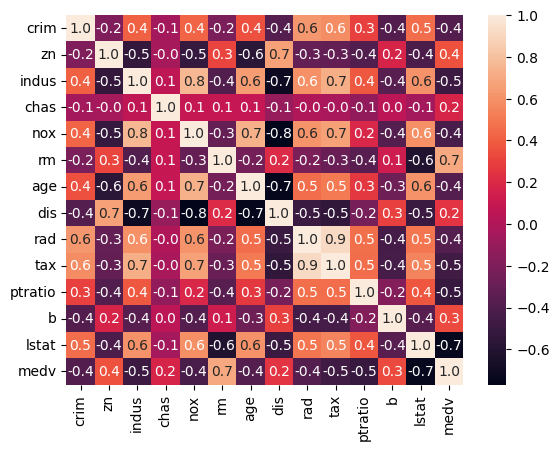

In [11]:
sns.heatmap(df.corr(),annot=True,fmt=".1f")


# Prepare the Data for Model Building


In [21]:
X = df.drop('medv', axis=1)  # dropping the target column
y = df['medv']               # keeping only the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the Linear Regression Model


In [13]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model


In [14]:
y_pred = model.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error is a measure of the average squared difference between the predicted and actual values.
# A lower MSE indicates a better fit.
# R² Score is a statistical measure of how close the data are to the fitted regression line.
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 24.291119474973478
R² Score: 0.6687594935356326


# Visualize the Model's Predictions


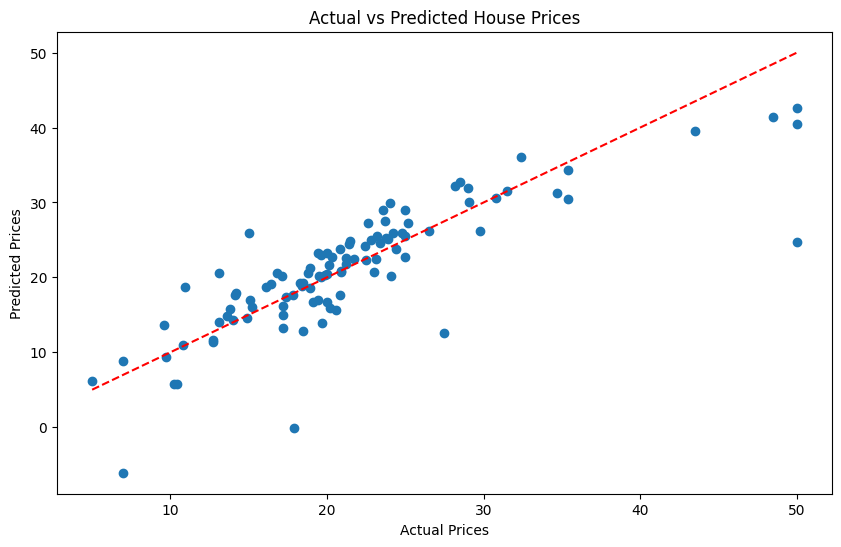

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()